# Brief introduction to NetworkX

Network Analysis is a broad, emerging field across many disciplines. It focuses on the role of relationships ("edges") between entities ("nodes"). Nodes could be people or neurons or power plants or genes. Edges might include friendships or connections or co-presence at events.

Here, I show a very brief introduction to how to use the [networkx](https://networkx.github.io/) package to do basic network analysis.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Creating a graph object

`networkx` has a number of built-in functions that let you create random networks. Here I show a Barabasi-Albert graph, which is highly skewed with a few central nodes.

In [2]:
G = nx.barabasi_albert_graph(100,2)

It's often useful to visualize these networks. `networkx` includes a number of visualization options. Here's a simple one.

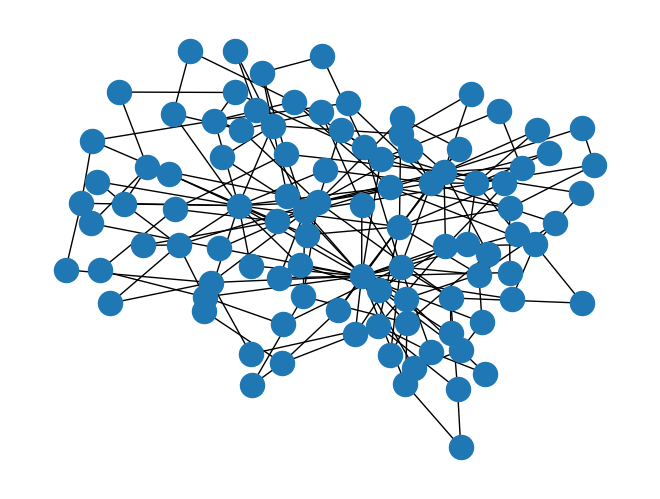

In [3]:
nx.draw_spring(G);

We also often want to get information about the network. For example, here is the degree distribution (a histogram of how many edges each node has).

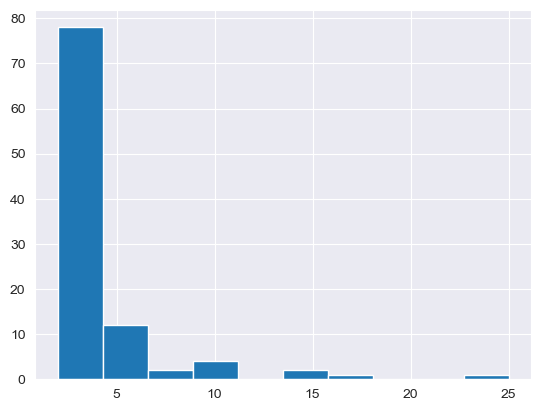

In [4]:
plt.hist([v for k,v in nx.degree(G)]);

And here is the betweenness centrality. Other measures have a similar syntax.

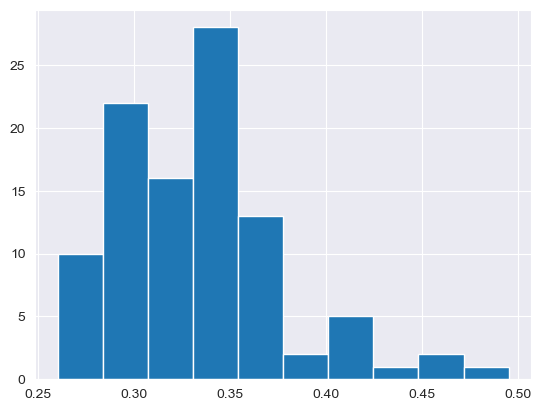

In [5]:
plt.hist(nx.centrality.closeness_centrality(G).values());

There are also network-level measures.

In [6]:
nx.diameter(G)

6

In [7]:
nx.cluster.average_clustering(G)

0.1534507394566218

## Importing from Pandas

You likely want to create a network from data. In order to create a graph object, you need to convert the data into what's called an "edgelist". The easiest way to do this is with a data frame which has at least two columns.

The first is the source node, the second is the target node, and after that are any attributes of the edges (e.g., weight or valence). Here's a simple example

In [8]:
nodes = list(range(100))

df = pd.DataFrame({'from': np.random.choice(nodes, 100),
                   'to': np.random.choice(nodes,100)
                  })

In [9]:
df

,from,to
0,80,14
1,59,49
2,61,55
3,26,39
4,85,82
...,...,...
95,86,88
96,29,95
97,62,5
98,74,7


In [10]:
G = nx.from_pandas_edgelist(df, source='from', target='to')

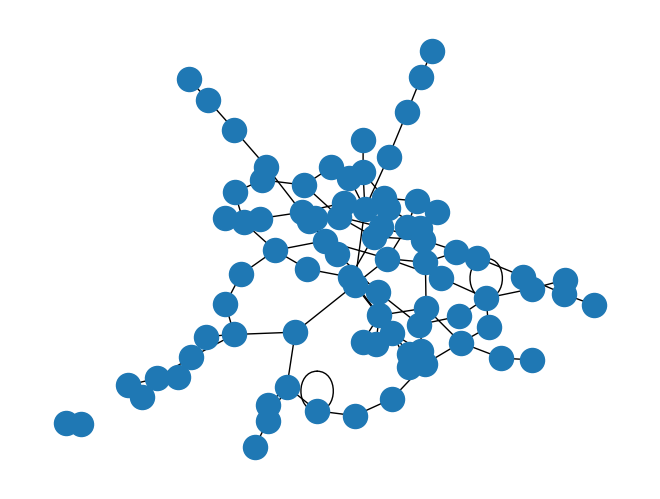

In [11]:
nx.draw(G);

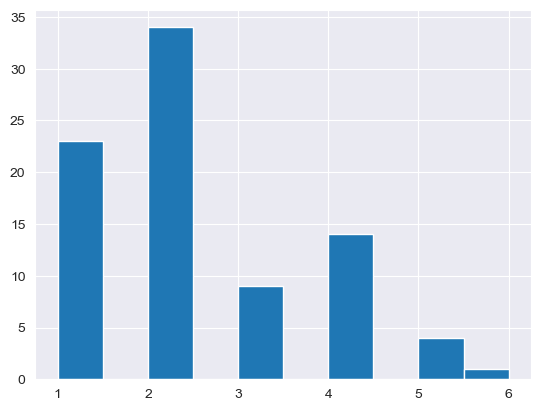

In [12]:
plt.hist([v for k,v in nx.degree(G)]);